In [1]:
%matplotlib inline

import numpy as np
from numpy import array 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from collections import Counter
from collections import defaultdict
from sklearn import metrics

from sklearn import tree
import scikitplot as skplt

from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

import scikitplot as skplt
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from scipy.special import expit
from sklearn.svm import LinearSVC

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint as sp_randint



## Datasets con solo 2 classi

In [2]:
df = pd.read_csv("df_RFE_NoOUt_LOF.csv")
df = df.drop(columns = ["Unnamed: 0"])

In [3]:
df

,tBodyAcc-entropy()-X,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-Y,tGravityAcc-max()-X,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-Y,1",...,fBodyAcc-max()-Y,fBodyAccJerk-max()-Y,"fBodyAccJerk-bandsEnergy()-1,16",fBodyGyro-maxInds-X,fBodyGyro-meanFreq()-X,fBodyAccMag-mad(),fBodyAccMag-energy(),fBodyBodyGyroJerkMag-std(),"angle(Y,gravityMean)",label
0,0.345317,-0.212158,0.239351,-0.252035,0.873172,-0.031452,0.953407,-0.243722,-0.893938,-0.068162,...,-0.396159,-0.016367,-0.672864,-0.266667,0.107934,-0.199371,-0.685753,-0.492884,0.256919,0
1,0.308494,-0.187704,0.280470,-0.264278,0.884731,-0.027424,0.953407,-0.244126,-0.882935,-0.118568,...,-0.379803,-0.281051,-0.765346,-0.933333,-0.179807,-0.246250,-0.719660,-0.481924,0.264452,0
2,0.447831,-0.195782,0.446540,-0.259838,0.884731,-0.027424,0.962737,-0.244126,-0.887160,-0.106952,...,-0.285737,-0.154582,-0.729589,-0.266667,-0.175160,-0.187848,-0.671153,-0.299226,0.260850,0
3,0.397099,-0.224966,0.503660,-0.257100,0.882346,-0.027034,0.960761,-0.230658,-0.889778,0.047690,...,-0.194195,-0.038508,-0.758163,-0.266667,-0.176372,-0.227376,-0.683914,-0.300338,0.259629,0
4,0.356124,-0.151776,0.465738,-0.254778,0.877173,-0.027034,0.960761,-0.228546,-0.891891,-0.046807,...,-0.326774,-0.102898,-0.758281,-0.266667,0.192512,-0.241951,-0.704713,-0.465015,0.258258,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,0.195643,-0.211822,-0.283335,-0.222004,0.867718,-0.016391,0.920554,-0.234998,-0.918375,-0.689028,...,-0.224135,-0.614001,-0.775736,-1.000000,-0.434780,-0.007392,-0.584282,-0.723951,0.238604,1
2093,0.178138,-0.198555,-0.274504,-0.242054,0.866116,-0.016391,0.920554,-0.234998,-0.902880,-0.662997,...,-0.261767,-0.613520,-0.780751,-0.933333,-0.516570,-0.172448,-0.632536,-0.771183,0.252676,1
2094,0.173131,-0.226826,-0.198452,-0.236950,0.854641,0.024684,0.933008,-0.216004,-0.907561,-0.459707,...,-0.263932,-0.626141,-0.783616,-0.933333,-0.289537,-0.216074,-0.641170,-0.726372,0.249145,1
2095,0.160333,-0.257775,-0.189915,-0.233230,0.855988,0.024684,0.933008,-0.210542,-0.910648,-0.418440,...,-0.262225,-0.542854,-0.821137,-0.933333,-0.362980,-0.220443,-0.663579,-0.689421,0.246432,1


KeyboardInterrupt: 

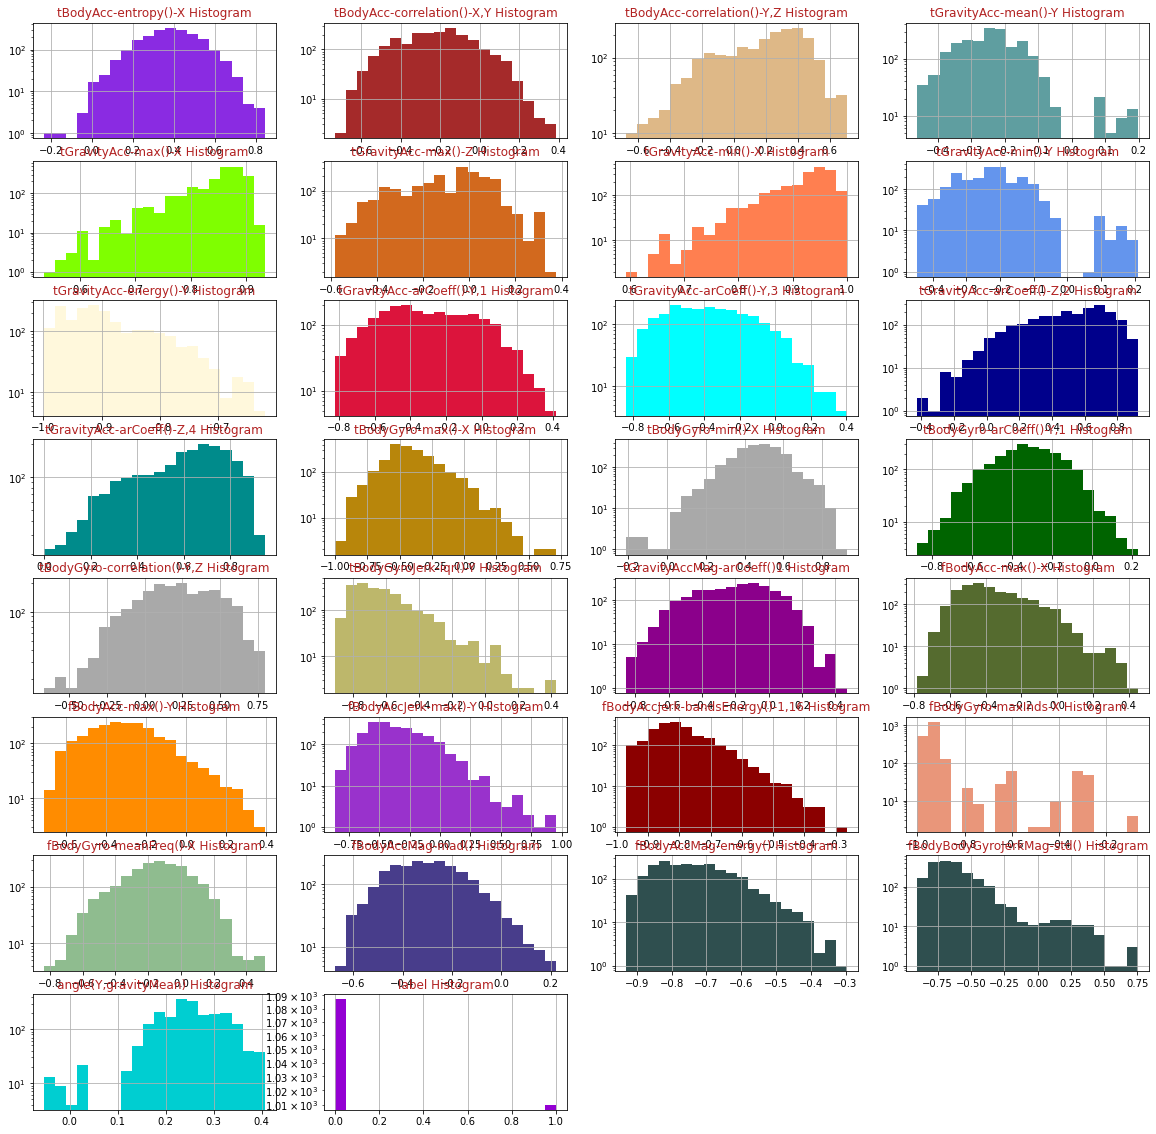

In [205]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(df,df.columns,8,4)

In [4]:
df_test = pd.read_csv("df_RFE_test.csv")
df_test = df_test.drop(columns = ["Unnamed: 0"])
df_test = df_test[(df_test['label'] == 1) | (df_test['label'] == 2)]
df_test["label"] = df_test["label"].map({1:0,2:1})
df["label"].value_counts()


0    1087
1    1010
Name: label, dtype: int64

In [5]:
attributes = [col for col in df_test.columns if col != 'label']

X_train = df[attributes].values
y_train = np.array(df['label'])

X_test = df_test[attributes].values
y_test = np.array(df_test['label'])
X_train.shape,y_train.shape

((2097, 29), (2097,))

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Dataset: RFE (30 classi), No outliers (-57 outliers), StandardScaler()

In [14]:
pca = PCA(n_components=1).fit(X_train[1])
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier()
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

TypeError: ravel() takes from 0 to 1 positional arguments but 2 were given

In [207]:
knn3 = KNeighborsClassifier().fit(X_train_pca, y_train)
y_pred_knn3 = knn3.predict(X_test_pca)
print(classification_report(y_test, y_pred_knn3))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       496
           1       0.93      0.78      0.85       471

    accuracy                           0.87       967
   macro avg       0.88      0.86      0.86       967
weighted avg       0.87      0.87      0.86       967



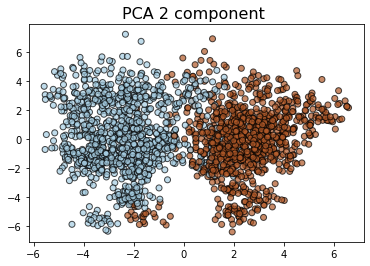

In [208]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, -1], c=y_train, cmap="Paired", edgecolor='k', alpha=0.7)
plt.title("PCA 2 component ", fontsize = 16)
plt.show()

# SVM

In [15]:
param_dist = {"kernel": ['rbf', 'sigmoid',"poly"], # fondamentale per plottare le regioni di piano
              "C": sp_randint(1, 10),
              "gamma": ["scale", "auto"], # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
              "probability": [True, False], # Whether to enable probability estimates. 
              "class_weight":['balanced', None]}
#define the number of iters
n_iter_search = 20
#define the model
clf = SVC()
#define the grid search
grid_search = RandomizedSearchCV(clf, param_distributions=param_dist, 
                            n_iter=n_iter_search, 
                            n_jobs=10, 
                            scoring=make_scorer(accuracy_score), verbose=5)
#run the grid search
grid_search.fit(X_train, y_train)

print('Best setting parameters\n', grid_search.cv_results_['params'][0])
print('\nMean of this setting\n', grid_search.cv_results_['mean_test_score'][0], 
      '\n\nStandard Deviation (std) of this setting\n', grid_search.cv_results_['std_test_score'][0])

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best setting parameters
 {'C': 1, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'sigmoid', 'probability': True}

Mean of this setting
 0.9099753717912286 

Standard Deviation (std) of this setting
 0.06726394657527326


In [23]:
grid_search.best_params_

{'C': 2,
 'class_weight': None,
 'gamma': 'auto',
 'kernel': 'rbf',
 'probability': True}

## RBF

In [217]:
clf = SVC(kernel="rbf", C= 0.2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9441571871768356
F1-score [0.94642857 0.94168467]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       496
           1       0.96      0.93      0.94       471

    accuracy                           0.94       967
   macro avg       0.94      0.94      0.94       967
weighted avg       0.94      0.94      0.94       967



In [218]:
support_vectors_per_class = clf.n_support_
print(support_vectors_per_class)

[183 189]


In [219]:
support_vector_indices = clf.support_
print(len(support_vector_indices))

372


In [220]:
predictions_dt_binary = cross_val_predict(clf, X_test, y_test)

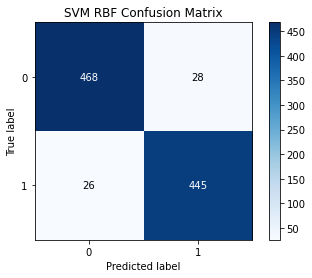

In [221]:
skplt.metrics.plot_confusion_matrix(y_test, predictions_dt_binary)
plt.title('SVM RBF Confusion Matrix')
plt.show()

## Sigmoid

In [185]:
clf2 = SVC(C= 0.1, class_weight= 'balanced', gamma= 'auto', kernel= 'sigmoid', probability= True)
clf2.fit(X_train, y_train)

y_pred2 = clf2.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred2))
print('F1-score %s' % f1_score(y_test, y_pred2))

Accuracy 0.9327817993795243
F1-score 0.9260523321956768


In [186]:
support_vectors_per_class2 = clf2.n_support_
print(support_vectors_per_class2)

[203 190]


In [187]:
support_vector_indices = clf2.support_
print(len(support_vector_indices))

393


## Linear

In [51]:
clf3 = SVC(kernel="linear", C=2)
clf3.fit(X_train, y_train)

y_pred3 = clf3.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred3))
print('F1-score %s' % f1_score(y_test, y_pred3))

Accuracy 0.9131334022750776
F1-score 0.9027777777777779


## Poly

In [73]:
clf4 = SVC(kernel="poly", C=1)
clf4.fit(X_train, y_train)

y_pred4 = clf4.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred4))
print('F1-score %s' % f1_score(y_test, y_pred4))

Accuracy 0.8479834539813857
F1-score 0.8209500609013399


# Plot

In [188]:
decision_function = clf.decision_function(X_train)
support_vector_indices = clf.support_
support_vectors = X_train[support_vector_indices]

In [212]:
support_vectors_pca = pca.transform(support_vectors)
support_vectors_pca

array([[-3.92579793,  3.60988204],
       [-3.67655884,  3.33854916],
       [-3.42593592,  3.69983932],
       [-1.02850025, -0.01116889],
       [-0.96344132, -0.37320116],
       [-1.44337967,  0.663451  ],
       [-1.69990952, -0.01574017],
       [-0.34552283, -1.70205846],
       [-0.54802219, -0.10954873],
       [-4.15916976,  2.30624486],
       [-2.78006944,  1.88957546],
       [-4.08933155,  2.52941818],
       [-4.307946  ,  3.629376  ],
       [-4.06978423,  0.26234413],
       [-3.67297082,  0.05252164],
       [-3.48818954,  0.07293657],
       [-3.47807372,  1.13984269],
       [-3.93867708,  1.77589377],
       [-4.43976294,  4.9216382 ],
       [-3.97789061,  5.01500232],
       [-3.01101368,  3.71460583],
       [-4.31318542,  4.38124794],
       [-4.41234809,  4.84940714],
       [ 0.06468834,  0.94132008],
       [-0.3432539 ,  2.02111412],
       [-0.20495892,  2.27915646],
       [-0.67316252,  2.64665678],
       [-0.87105237,  1.64111108],
       [-2.8963829 ,

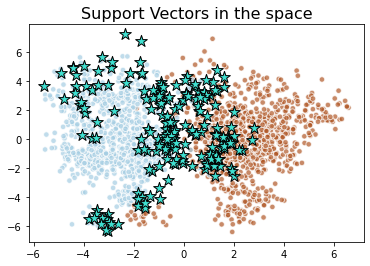

In [215]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap="Paired", edgecolor='White', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:200, 0], support_vectors_pca[:200, 1], s=150,
                linewidth=1, marker ="*",facecolors='turquoise', edgecolors='k')
plt.title("Support Vectors in the space", fontsize = 16)
plt.show()

In [191]:
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
scores2 = cross_val_score(clf2, X_train, y_train, cv=5, scoring='f1')
scores3 = cross_val_score(clf3, X_train, y_train, cv=5, scoring='f1')
scores4 = cross_val_score(clf4, X_train, y_train, cv=5, scoring='f1')

In [192]:
print("- VALORI Rbf - \n")

print("Accuracy:   \t\t", round(metrics.accuracy_score(y_test, y_pred),3))
print('F1- Score:\t\t', round(metrics.f1_score(y_test, y_pred),3))
print("Cross Validation:\t", round(scores.mean(),3),"\n")

print("- VALORI Sigmoid - \n")

print("Accuracy:   \t\t", round(metrics.accuracy_score(y_test, y_pred2),3))
print('F1- Score:\t\t', round(metrics.f1_score(y_test, y_pred2),3))
print("Cross Validation:\t", round(scores2.mean(),3),"\n")

print("- VALORI Linear - \n")

print("Accuracy:   \t\t", round(metrics.accuracy_score(y_test, y_pred3),3))
print('F1- Score:\t\t', round(metrics.f1_score(y_test, y_pred3),3))
print("Cross Validation:\t", round(scores3.mean(),3),"\n")

print("- VALORI Poly - \n")

print("Accuracy:   \t\t", round(metrics.accuracy_score(y_test, y_pred4),3))
print('F1- Score:\t\t', round(metrics.f1_score(y_test, y_pred4),3))
print("Cross Validation:\t", round(scores4.mean(),3),"\n")

- VALORI Rbf - 

Accuracy:   		 0.944
F1- Score:		 0.942
Cross Validation:	 0.945 

- VALORI Sigmoid - 

Accuracy:   		 0.933
F1- Score:		 0.926
Cross Validation:	 0.935 

- VALORI Linear - 

Accuracy:   		 0.913
F1- Score:		 0.903
Cross Validation:	 0.922 

- VALORI Poly - 

Accuracy:   		 0.848
F1- Score:		 0.821
Cross Validation:	 0.944 



C:\Users\daddu\AppData\Local\Temp/ipykernel_12468/2807667736.py:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap="Pastel1", alpha=0.8)
C:\Users\daddu\AppData\Local\Temp/ipykernel_12468/2807667736.py:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap="Pastel1", alpha=0.8)
C:\Users\daddu\AppData\Local\Temp/ipykernel_12468/2807667736.py:33: MatplotlibDeprecationWarning: shading='flat' when X 

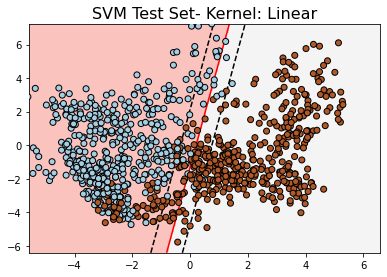

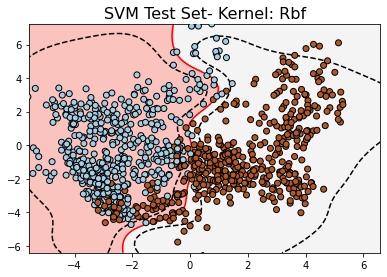

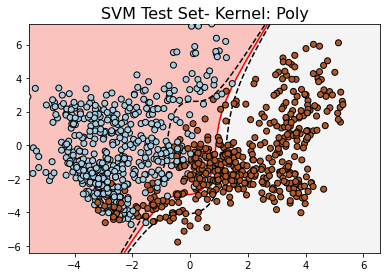

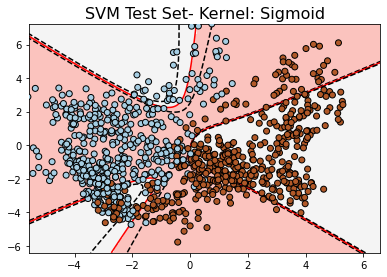

In [193]:
# Our dataset and targets
X = X_train_pca
Y = y_train

# figure number
fignum = 1

for kernel in ('linear',"rbf","poly","sigmoid"):
    clf = SVC(kernel=kernel, C= 0.1, class_weight= 'balanced', gamma= 'auto', probability= True)
    clf.fit(X,Y)
    
    plt.figure(fignum, figsize=(6.3,4.2))
    plt.clf()


    # Circle out the test data
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, zorder=10, cmap="Paired",
                edgecolor='k')


    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    
    plt.pcolormesh(XX, YY, Z > 0, cmap="Pastel1", alpha=0.8)
    plt.contour(XX, YY, Z, colors=['k', 'red', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    fignum = fignum + 1

    plt.title("SVM Test Set- Kernel: "+kernel.capitalize(), fontsize = 16)
plt.show()

C:\Users\daddu\AppData\Local\Temp/ipykernel_12468/3446071239.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)
C:\Users\daddu\AppData\Local\Temp/ipykernel_12468/3446071239.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)
C:\Users\daddu\AppData\Local\Temp/ipykernel_12468/3446071239.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated sinc

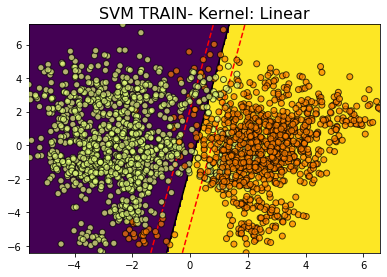

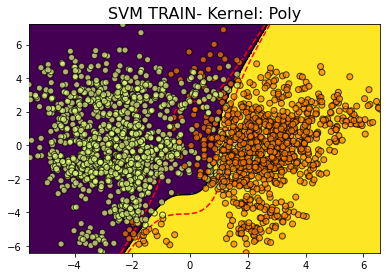

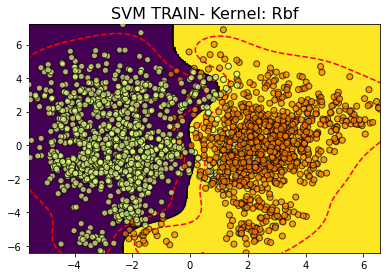

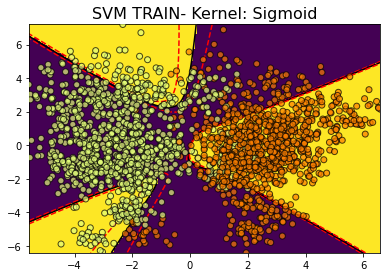

In [194]:
# Our dataset and targets
X = X_train_pca
Y = y_train

# figure number
fignum = 1

# fit the model
for kernel in ("linear", "poly", "rbf", "sigmoid"):
    clf = svm.SVC(kernel=kernel, C= 0.1, class_weight= 'balanced', gamma= 'auto', probability= True)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(6.3,4.2))
    plt.clf()

    
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, zorder=10, cmap="Wistia", edgecolors="k", alpha=0.7)

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["red", "k", "red"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title("SVM TRAIN- Kernel: "+kernel.capitalize(), fontsize = 16)

    fignum = fignum + 1
plt.show()